In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
train_data = pd.read_csv("C:/Users/Asus/Downloads/titanic/train.csv")
test_data = pd.read_csv("C:/Users/Asus/Downloads/titanic/test.csv")

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_data['Survived'].value_counts(normalize = True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [8]:
train_data.fillna({ 'Age' : train_data['Age'].median()}, inplace = True)
train_data.fillna({ 'Embarked': train_data['Embarked'].mode()[0]},inplace = True) # We use [0] after mode because .mode() gives a series.
train_data.drop('Cabin', axis= 1, inplace = True, errors = 'ignore')

In [9]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [12]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [41]:
#Label Encoding
le_sex = LabelEncoder()
train_data['Sex'] = le_sex.fit_transform(train_data['Sex']) # Assigns 0 as woman and 1 as man
print(list(le_sex.classes_))
le_embarked = LabelEncoder()
train_data['Embarked'] = le_embarked.fit_transform(train_data['Embarked'])
print("Embarked encoding:",list(le_embarked.classes_))

[0, 1]
Embarked encoding: [0, 1, 2]


<Axes: xlabel='Sex', ylabel='Survived'>

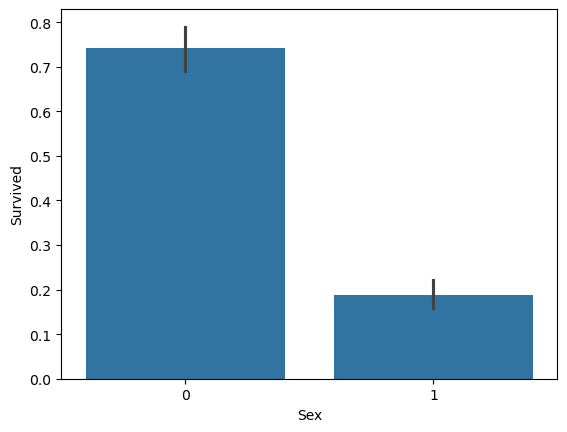

In [28]:
# Exploratory Data Analysis
sns.barplot(x= 'Sex', y = 'Survived', data = train_data)

# Insights:
From the above  Barplot we know that 70-75% of total women survived and 15-20% percent of total men survived.

<Axes: xlabel='Pclass', ylabel='Survived'>

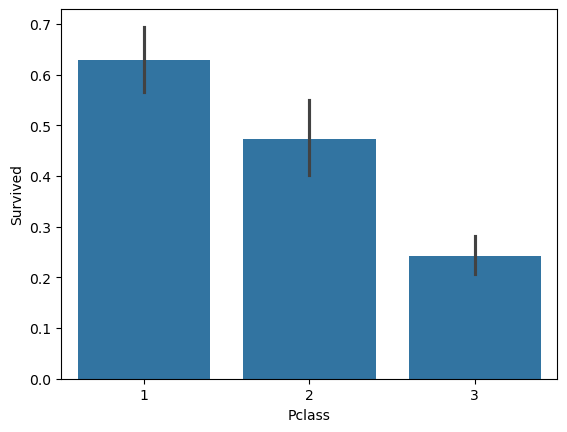

In [29]:
sns.barplot( x = 'Pclass', y = 'Survived', data = train_data)

# Insights:
This shows us that 60-65% of First class passengers survived.
This also portrays that 45-50% of Second class passengers survived.
This also shows 20-25% of Third class passengers survived.

<Axes: xlabel='Age', ylabel='Count'>

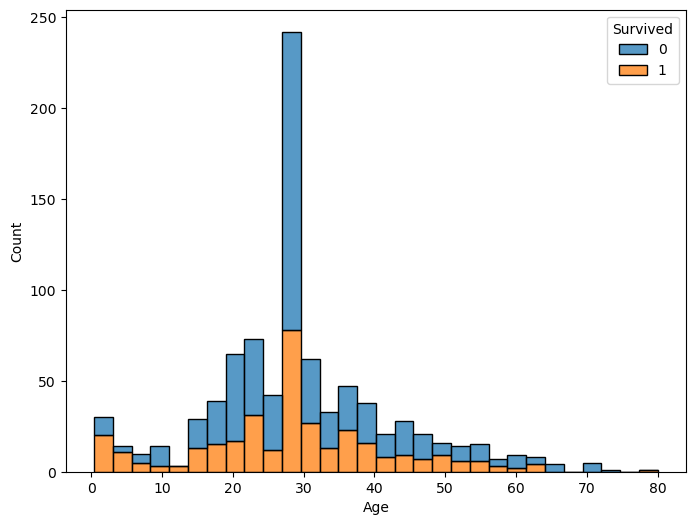

In [30]:
figure(figsize=(8, 6))
sns.histplot( data = train_data, x = 'Age', hue = 'Survived', multiple= 'stack', bins =30)

# Insights:
This Histogram shows us that children had higher rates of survival compared to other age groups.

<Axes: xlabel='Parch', ylabel='Survived'>

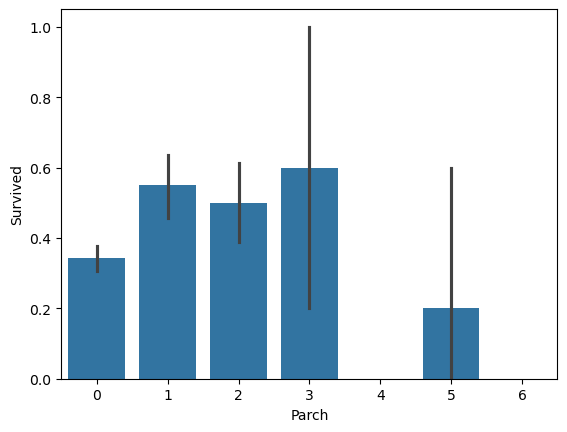

In [32]:
sns.barplot( x= 'Parch', y='Survived', data = train_data)

# Insights:
This shows us that Passengers with 1-3 dependents had a higher chance of survival compared to other groups.